In [5]:
%matplotlib notebook

# Obviously
import pandas as pd
import numpy as np

# Plotting set-up
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc
# Command to reset plot styles to default: mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use('seaborn-poster')
mpl.rcParams['font.family'] = 'serif'
% matplotlib inline

# Other packages we might need
#! pip install quandl
# import quandl

# Options
pd.set_option('display.height', 500)
pd.set_option('display.max_rows', 500)
data_folder = '../data/'


pd.set_option('display.height', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
listings_1 = pd.read_csv(data_folder + 'listings.csv')
# reviews_1 = pd.read_csv(data_folder + 'reviews.csv')
# calendar_1 = pd.read_csv(data_folder + 'calendar.csv')
# neighborhoods_1 = pd.read_csv(data_folder + 'neighbourhoods.csv')

listings = listings_1.copy()


from pandas.api.types import is_numeric_dtype, is_datetime64_dtype
# make all numerical data in float
# date_columns = ['first_review', 'last_review', 'calendar_last_scraped', 'host_since', 'last_scraped']
# for col in date_columns:
#     if not is_datetime64_dtype(listings[col]):
#         listings[col] = pd.to_datetime(listings[col])
        
price_columns = ['price', 'weekly_price']
for col in price_columns:
    if not is_numeric_dtype(listings[col]):
        listings[col] = listings[col].str.replace('$', '')
        listings[col] = listings[col].str.replace(',', '')
        listings[col] = listings[col].astype(np.float64)

# percentage_columns = ['host_acceptance_rate']
# for col in percentage_columns:
#     if not is_numeric_dtype(listings[col]):
#         listings[col] = listings[col].str.replace('%', '')
#         listings[col] = listings[col].str.replace(',', '')
#         listings[col] = listings[col].astype(np.float64)/100
        
boolean_columns = ['has_availability','instant_bookable']
for col in boolean_columns:
    for index,value in listings[col].iteritems():
        if listings[col][index]=='t':
            listings.set_value(index, col, 1.0)
        else:
            listings.set_value(index, col, 0.0)

# digitize amenities

amenity=listings['amenities'].apply(lambda x: x.replace('"', '').replace('{', '').replace('}', '').split(','))
amenity_dic={}
for index,value in amenity.iteritems():
    for item in value:
        if item != '':
            if item in amenity_dic.keys():
                amenity_dic[item]=amenity_dic[item]+1
            else:
                amenity_dic[item]=1


# print(amenity_dic)
sLength=len(listings['id'])
for key in amenity_dic:
#     print(key)
    listings[key] = pd.Series(np.zeros(sLength), index=listings.index)

for index,value in amenity.iteritems():
    for item in value:
        listings.set_value(index, item, 1.0)


# digitize cancelation policy
sLength=len(listings['id'])
cancelation_policy={}
for index,value in listings['cancellation_policy'].iteritems():
    if value in cancelation_policy.keys():
        cancelation_policy[value]=cancelation_policy[value]+1
    else:
        cancelation_policy[value]=1
        
print(cancelation_policy)
# {'super_strict_60': 2,'super_strict_30': 44,'strict': 2505, 'moderate': 1174,'flexible': 1145,}


listings['cancellation_policy_num'] = pd.Series(np.zeros(sLength), index=listings.index)
cancelation_policy_convert={'no_refunds':0.0,'super_strict_60': 1.0,'super_strict_30': 2.0,'strict': 3.0, 'moderate': 4.0,'flexible': 5.0}

# data=listings['cancellation_policy']
# for index,value in data.iteritems():
#     print(value)
for index,value in listings['cancellation_policy'].iteritems():
#     print(value)
    listings.set_value(index, 'cancellation_policy_num', cancelation_policy_convert[value])


# digitize bed type
sLength=len(listings['id'])
bed_type={}
for index,value in listings['bed_type'].iteritems():
    if value in bed_type.keys():
        bed_type[value]=bed_type[value]+1
    else:
        bed_type[value]=1
        
print(bed_type)
# {'super_strict_60': 2,'super_strict_30': 44,'strict': 2505, 'moderate': 1174,'flexible': 1145,}


listings['bed_type_num'] = pd.Series(np.zeros(sLength), index=listings.index)
bed_type_convert={'Real Bed': 0, 'Futon': 1, 'Pull-out Sofa': 2, 'Couch': 3, 'Airbed': 4}

# data=listings['cancellation_policy']
# for index,value in data.iteritems():
#     print(value)
for index,value in listings['bed_type'].iteritems():
#     print(value)
    listings.set_value(index, 'bed_type_num', bed_type_convert[value])

# digitize room type
sLength=len(listings['id'])
room_type={}
for index,value in listings['room_type'].iteritems():
    if value in room_type.keys():
        room_type[value]=room_type[value]+1
    else:
        room_type[value]=1
        
print(room_type)
# {'super_strict_60': 2,'super_strict_30': 44,'strict': 2505, 'moderate': 1174,'flexible': 1145,}


listings['room_type_num'] = pd.Series(np.zeros(sLength), index=listings.index)
room_type_convert={'Shared room': 0, 'Private room': 1, 'Entire home/apt': 2}


for index,value in listings['room_type'].iteritems():
#     print(value)
    listings.set_value(index, 'room_type_num', room_type_convert[value])

listings['zipcode'].apply(lambda x: str(x).zfill(5)).dtype

height has been deprecated.

height has been deprecated.

{'strict': 22277, 'super_strict_60': 72, 'super_strict_30': 27, 'no_refunds': 3, 'moderate': 12570, 'flexible': 15372}
{'Pull-out Sofa': 290, 'Real Bed': 49062, 'Airbed': 309, 'Futon': 471, 'Couch': 189}
{'Private room': 16778, 'Entire home/apt': 31586, 'Shared room': 1957}


dtype('O')

2017-11-04


<IPython.core.display.Javascript object>


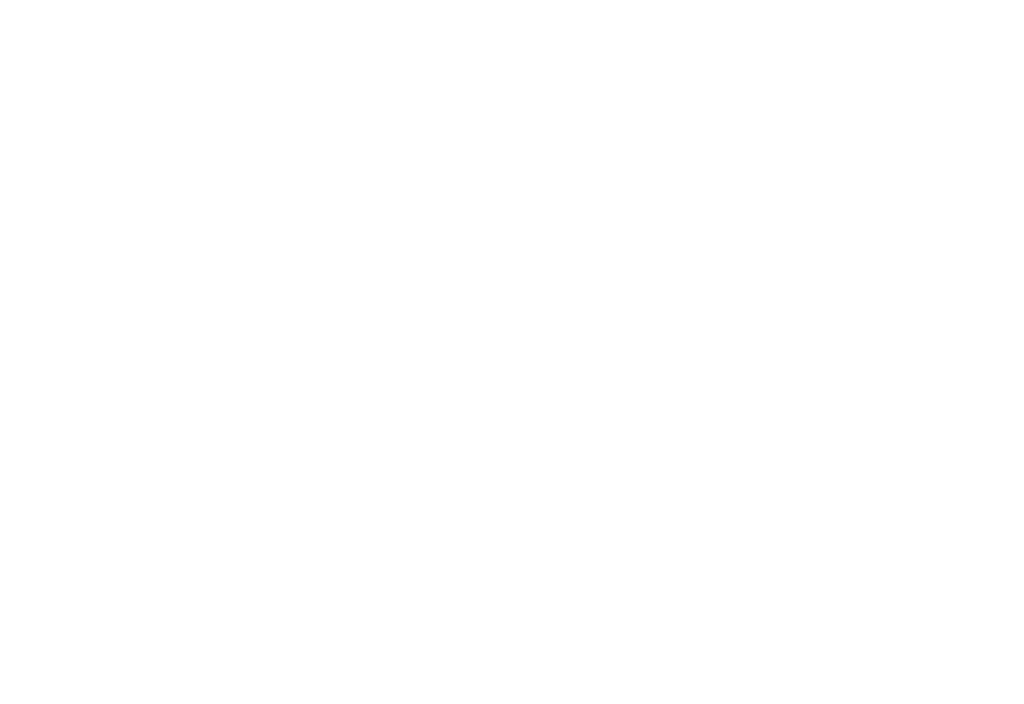

In [11]:
%matplotlib notebook
# getting each individual columns for plotting

# price
price=listings['price'].values/300
price[price>1]=1

# time on airbnb for normalization
import datetime as dt     
date = dt.date.today()
print(date)

# listings['dtoday'] = date
# # print(type(date))
# listings['today']=pd.to_datetime(listings['today'])
# print(listings['today'])
# listings['host_since']=pd.to_datetime(listings['host_since'])
# print(listings['host_since'])
# listings['days'] = (listings['today'] - listings['host_since']).dt.days
# # print(listings['days'])
# length=listings['days'].values

# # review frequency
# review_freq=listings['number_of_reviews'].values/(listings['days'].values/365*54)
# reviews_per_month=listings['reviews_per_month'].values
# # print (review_freq)

# ammenity score

sLength=len(listings['id'])
amenity_score = np.zeros(sLength)
for amenities in amenity_dic.keys():
#     print(amentities)
    amenity_score=amenity_score+listings[amenities].values
# print(amenity_score)
listings['amenity_score'] = pd.Series(amenity_score, index=listings.index)

# review score rating
review_score=listings['review_scores_rating'].values/100

# latitude
latitude=listings['latitude'].values

# longtitude
longtitude=listings['longitude'].values

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# plot any three dimension
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(price,review_score, latitude)

# ax.scatter(price,listings['review_scores_rating'].values, review_freq)

ax.set_xlabel('price')
ax.set_ylabel('review score')
ax.set_zlabel('latitude')

plt.title("visulize data")
plt.show()



<IPython.core.display.Javascript object>


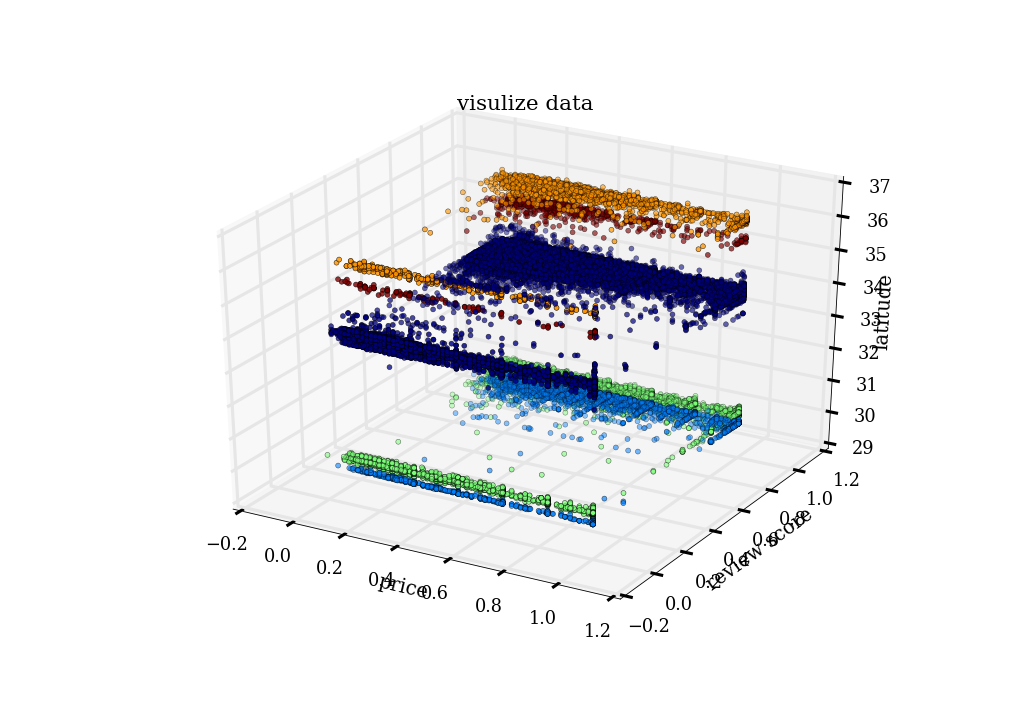

In [15]:
%matplotlib notebook
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import make_blobs


# X=np.vstack((price,review_score, review_freq)).T
X=np.vstack((price,review_score,latitude,)).T

X[np.isnan(X)]=0

# different cluster methods

# KMeans
y_pred_kmeans = KMeans(n_clusters=10, random_state=12345).fit_predict(X)

# DBSCAN
# db = DBSCAN(eps=0.01, min_samples=25).fit(X)
# y_pred_DBSCAN = db.labels_
# print(max(y_pred_DBSCAN),min(y_pred_DBSCAN))

# GaussianMixture
# gmm = GaussianMixture(n_components=4,covariance_type='full', max_iter=20, random_state=0).fit(X)
# y_pred_gmm=gmm.predict(X)
# gmm.fix(X)

# hierarchical clustering (WARD)
# clustering = AgglomerativeClustering(linkage='ward', n_clusters=5)
# y_pred_ward=clustering.fit_predict(X)
# print(y_pred_ward)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0],X[:,1],X[:,2],c=y_pred_ward)

# ax.scatter(price,listings['review_scores_rating'].values, review_freq)

ax.set_xlabel('price')
ax.set_ylabel('review score')
ax.set_zlabel('latitude')

plt.title("visulize data")
plt.show()

In [14]:
listings.loc[3]

accommodates                                                                                  6
amenities                                     {Internet,"Wireless Internet","Air Conditionin...
availability_30                                                                              28
bathrooms                                                                                   2.5
bed_type                                                                               Real Bed
bedrooms                                                                                      1
beds                                                                                          6
cancellation_policy                                                                    moderate
city                                                                                  Asheville
has_availability                                                                              0
host_id                                 